In [151]:
from sklearn import *
from tensorflow import keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_digits
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os
from collections import Counter
root_dir = r'/Users/pankaj/Library/Mobile Documents/com~apple~CloudDocs/Capstone/Wikipedia Data'


result_path = annot_file_path = os.path.join(root_dir , 'comments_with_grouped_annoptations.tsv')

merged_comments = pd.read_table(result_path)


In [152]:
print (merged_comments.head())

   Unnamed: 0  rev_id                                            comment  \
0           0   37675  `-NEWLINE_TOKENThis is not ``creative``.  Thos...   
1           1   44816  `NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...   
2           2   49851  NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...   
3           3   89320   Next, maybe you could work on being less cond...   
4           4   93890               This page will need disambiguation.    

   year  logged_in       ns  sample  split  worker_id  quoting_attack  \
0  2002      False  article  random  train       9721             0.0   
1  2002      False  article  random  train      20234             0.0   
2  2002      False  article  random  train      26474             0.0   
3  2002       True  article  random    dev      26738             0.0   
4  2002       True  article  random  train       8010             0.0   

   recipient_attack  third_party_attack  other_attack  attack  
0               0.0                 0.0 

In [153]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np



In [154]:
merged_comments['recipient_attack'] = merged_comments['recipient_attack'].apply(lambda x : 1 if x> 1 else 0 )
X_train = merged_comments['comment']
y = merged_comments['recipient_attack']
one_hot_train_labels = to_categorical(y)

In [155]:
sequence

<module 'tensorflow.keras.preprocessing.sequence' from '/Users/pankaj/anaconda/envs/nlp/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/preprocessing/sequence/__init__.py'>

In [156]:
one_hot_train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [157]:
merged_comments['new_attack'] = merged_comments['attack'].apply(lambda x : 1 if x> 1 else 0 )

In [158]:
Counter(merged_comments['attack'])

Counter({0.0: 57233,
         4.0: 4133,
         2.0: 10147,
         1.0: 20876,
         3.0: 6143,
         6.0: 2646,
         7.0: 2439,
         5.0: 3127,
         8.0: 2506,
         9.0: 2598,
         14.0: 132,
         10.0: 1920,
         11.0: 159,
         18.0: 115,
         12.0: 152,
         19.0: 108,
         26.0: 113,
         15.0: 125,
         28.0: 113,
         25.0: 95,
         17.0: 119,
         23.0: 91,
         21.0: 78,
         13.0: 116,
         30.0: 17,
         27.0: 118,
         16.0: 104,
         24.0: 98,
         20.0: 82,
         29.0: 69,
         22.0: 88,
         36.0: 2,
         31.0: 1,
         42.0: 1})

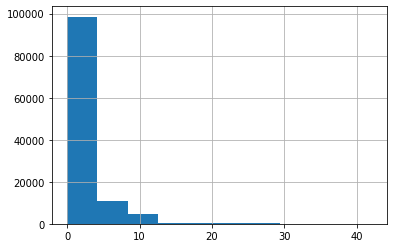

In [159]:
merged_comments.attack.hist()

In [160]:
######



In [161]:
one_hot_train_labels.shape

(115864, 2)

In [162]:
one_hot_train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [163]:
merged_comments['recipient_attack'].unique()

array([0, 1])

### TODO change model with proper word settings 

In [164]:
# Prepare training input  
training_samples = 90000
validation_samples = 10000
max_words = 30000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 187899 unique tokens.


In [165]:
from collections import Counter
comment_lengths = [len (seq) for seq in sequences]

In [166]:
word_counts_per_review = Counter(comment_lengths)

In [167]:
import numpy as np
np.percentile(comment_lengths, 90)

154.0

<BarContainer object of 1259 artists>

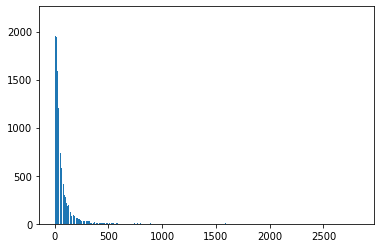

In [168]:
plt.bar( word_counts_per_review.keys(), word_counts_per_review.values())

In [169]:
maxlen = 150

In [170]:
data = pad_sequences(sequences, maxlen=maxlen)
print('Shape of data tensor:', data.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
x_train = data[:training_samples]
x_val = data[training_samples: (training_samples + validation_samples)]
x_test = data[(training_samples + validation_samples) : ]

Shape of data tensor: (115864, 150)


In [171]:
x_test.shape

(15864, 150)

In [172]:
# Prepare labels 
labels = np.asarray(one_hot_train_labels)
print('Shape of label tensor:', labels.shape)
labels = labels[indices]
y_train = labels[:training_samples]
y_val = labels[training_samples: training_samples + validation_samples]
y_test = labels[(training_samples + validation_samples) : ]

Shape of label tensor: (115864, 2)


In [173]:
log_dir='logs/log_basic1'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)


tb_collback = keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq= 1)
early_sp_cb= keras.callbacks.EarlyStopping(monitor='acc', min_delta=0.01, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
callbacks = [tb_collback, early_sp_cb]
#callbacks = []

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test_validate, y_train, y_test_validate = train_test_split(data, labels,
                                                    stratify=labels, 
                                                    test_size=0.40,
                                                    random_state=123)

X_test, X_validate, y_test, y_validate = train_test_split(X_test_validate, y_test_validate,
                                                    stratify = y_test_validate, 
                                                    test_size=0.50,
                                                    random_state=123)

In [175]:
from tensorboard.plugins import projector

In [176]:
from tensorflow.keras.layers import LSTM
model = Sequential()
embeddings_index = {}

embedding_dim = 16
with open('word2_wec_poinc', 'r') as f:
    #emb= f.readlines()


    for line in f:
        values = line.split()
        word = values[0]
        w= word.split(".")[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[w] = coefs

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

embedding = Embedding(max_words, embedding_dim  )
#embedding = Embedding(max_words, embedding_dim)

#embedding.trainable = False
model.add(embedding)
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
#model.layers[0].trainable = False

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          480000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                6272      
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 66        
Total params: 487,394
Trainable params: 487,394
Non-trainable params: 0
_________________________________________________________________


In [177]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [178]:
y_train.shape

(69518, 2)

In [179]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])


history = model.fit(X_train, y_train,
epochs= 20,
batch_size=128,
validation_data=(X_test_validate, y_test_validate), callbacks= callbacks)

Train on 69518 samples, validate on 46346 samples
Epoch 1/20
69518/69518 [==============================] - 54s 780us/sample - loss: 0.3970 - acc: 0.8299 - val_loss: 0.3453 - val_acc: 0.8617
Epoch 2/20
69518/69518 [==============================] - 51s 727us/sample - loss: 0.3083 - acc: 0.8739 - val_loss: 0.3149 - val_acc: 0.8703
Epoch 3/20
69518/69518 [==============================] - 50s 723us/sample - loss: 0.2894 - acc: 0.8807 - val_loss: 0.3211 - val_acc: 0.8671
Epoch 4/20
69518/69518 [==============================] - 50s 725us/sample - loss: 0.2793 - acc: 0.8862 - val_loss: 0.3182 - val_acc: 0.8757
Epoch 5/20
69518/69518 [==============================] - 55s 795us/sample - loss: 0.2726 - acc: 0.8886 - val_loss: 0.3223 - val_acc: 0.8700
Epoch 6/20
69518/69518 [==============================] - 76s 1ms/sample - loss: 0.2660 - acc: 0.8917 - val_loss: 0.3352 - val_acc: 0.8697
Epoch 7/20
69518/69518 [==============================] - 71s 1ms/sample - loss: 0.2595 - acc: 0.8951 - va

In [180]:

with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
    for subwords in tokenizer.index_word.values():
        f.write("{}\n".format(subwords))
  # Fill in the rest of the labels with "unknown"
    for unknown in range(1, tokenizer.num_words - len(tokenizer.index_word.values())):
        f.write("unknown #{}\n".format(unknown))

In [181]:
model.save('hyperbolic_model.h5')

In [182]:
weights = tf.Variable(model.layers[0].get_weights()[0][1:])
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

In [183]:
weights

<tf.Variable 'Variable:0' shape=(29999, 16) dtype=float32, numpy=
array([[ 0.12250417, -0.01544552,  0.11139341, ..., -0.04740725,
         0.01302393,  0.11930501],
       [ 0.08937246,  0.14187083,  0.10340409, ..., -0.01149065,
         0.06969211,  0.10117506],
       [ 0.06821918,  0.05195981,  0.07006718, ..., -0.05542741,
        -0.07211769,  0.11530446],
       ...,
       [ 0.05813454,  0.04427457,  0.0574814 , ..., -0.00784729,
         0.00705185,  0.05439197],
       [ 0.06358315,  0.05127985,  0.06225893, ...,  0.00636278,
         0.04415438,  0.06420188],
       [ 0.0681052 ,  0.05959349,  0.06986517, ..., -0.0354771 ,
         0.0301749 ,  0.06743347]], dtype=float32)>

#predictions = model.predict(test_data)

In [184]:
import os
PATH = os.getenv('PATH')
%env PATH=/Users/pankaj/anaconda/envs/nlp/bin:$PATH
    
%load_ext tensorboard
%tensorboard --logdir logs/log_basic


env: PATH=/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/condabin:/Users/pankaj/anaconda/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 6091), started 7:51:27 ago. (Use '!kill 6091' to kill it.)

In [185]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs/log_basic (started 7:51:27 ago; pid 6091)


In [186]:
notebook.display( height=1000) 


Selecting TensorBoard with logdir logs/log_basic (started 7:51:27 ago; port 6006, pid 6091).


In [187]:
test_output = model.predict([X_test])

In [188]:
y_pred = np.argmax([test_output])

In [189]:
y_pred = list(map(lambda x: np.argmax(x), test_output))
y_test_bin = list(map(lambda x: np.argmax(x), y_test))

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

cfm = confusion_matrix(y_test_bin,y_pred)

In [190]:
from sklearn.metrics import classification_report
print(accuracy_score(y_test_bin,y_pred))

report = classification_report(y_test_bin,y_pred)

print(report)



0.8708410650325811
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     17835
           1       0.86      0.53      0.65      5338

    accuracy                           0.87     23173
   macro avg       0.87      0.75      0.79     23173
weighted avg       0.87      0.87      0.86     23173



In [191]:
from sklearn.metrics import plot_confusion_matrix

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

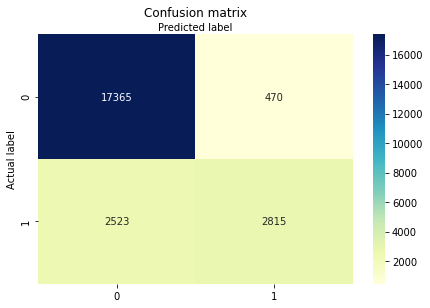

In [193]:
class_names=["Non-Toxic","Toxic"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cfm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')